In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [269]:
df = pd.read_excel("test.xlsx", sheet_name="Arkusz1")
df = pd.read_excel("test.xlsx")
df = df[['Year', 'Married', 'Income', "Mean age", "Household"]]

In [270]:
df.describe()

,Year,Married,Income,Mean age,Household
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,130663.173913,29424.347826,27.493478,119526.086957
std,6.78233,4969.723969,5971.686853,1.174086,7576.810008
min,2000.00000,120211.000000,22130.000000,25.950000,104705.000000
25%,2005.50000,127473.000000,25355.000000,26.425000,113863.500000
50%,2011.00000,130767.000000,28070.000000,27.400000,119927.000000
75%,2016.50000,134924.500000,33425.000000,28.450000,126021.500000
max,2022.00000,137772.000000,42330.000000,29.450000,131202.000000


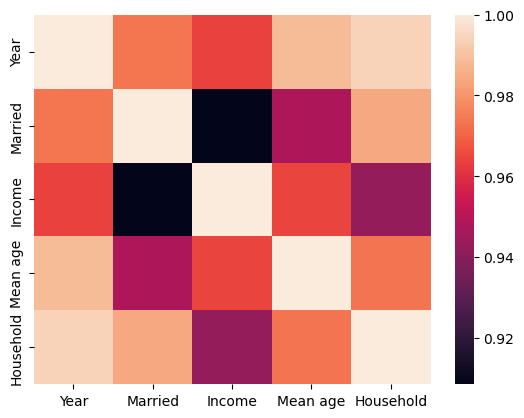

In [271]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [272]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

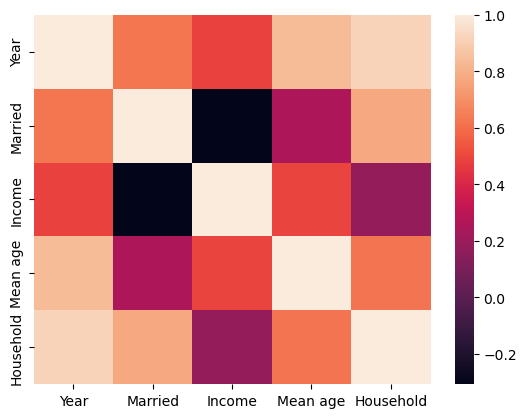

In [273]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [274]:
new

,Year,Married,Income,Mean age,Household
Year,1.000000,0.973903,0.964185,0.988373,0.993961
Married,0.973903,1.000000,0.908483,0.947680,0.984306
Income,0.964185,0.908483,1.000000,0.964535,0.942613
Mean age,0.988373,0.947680,0.964535,1.000000,0.973480
Household,0.993961,0.984306,0.942613,0.973480,1.000000


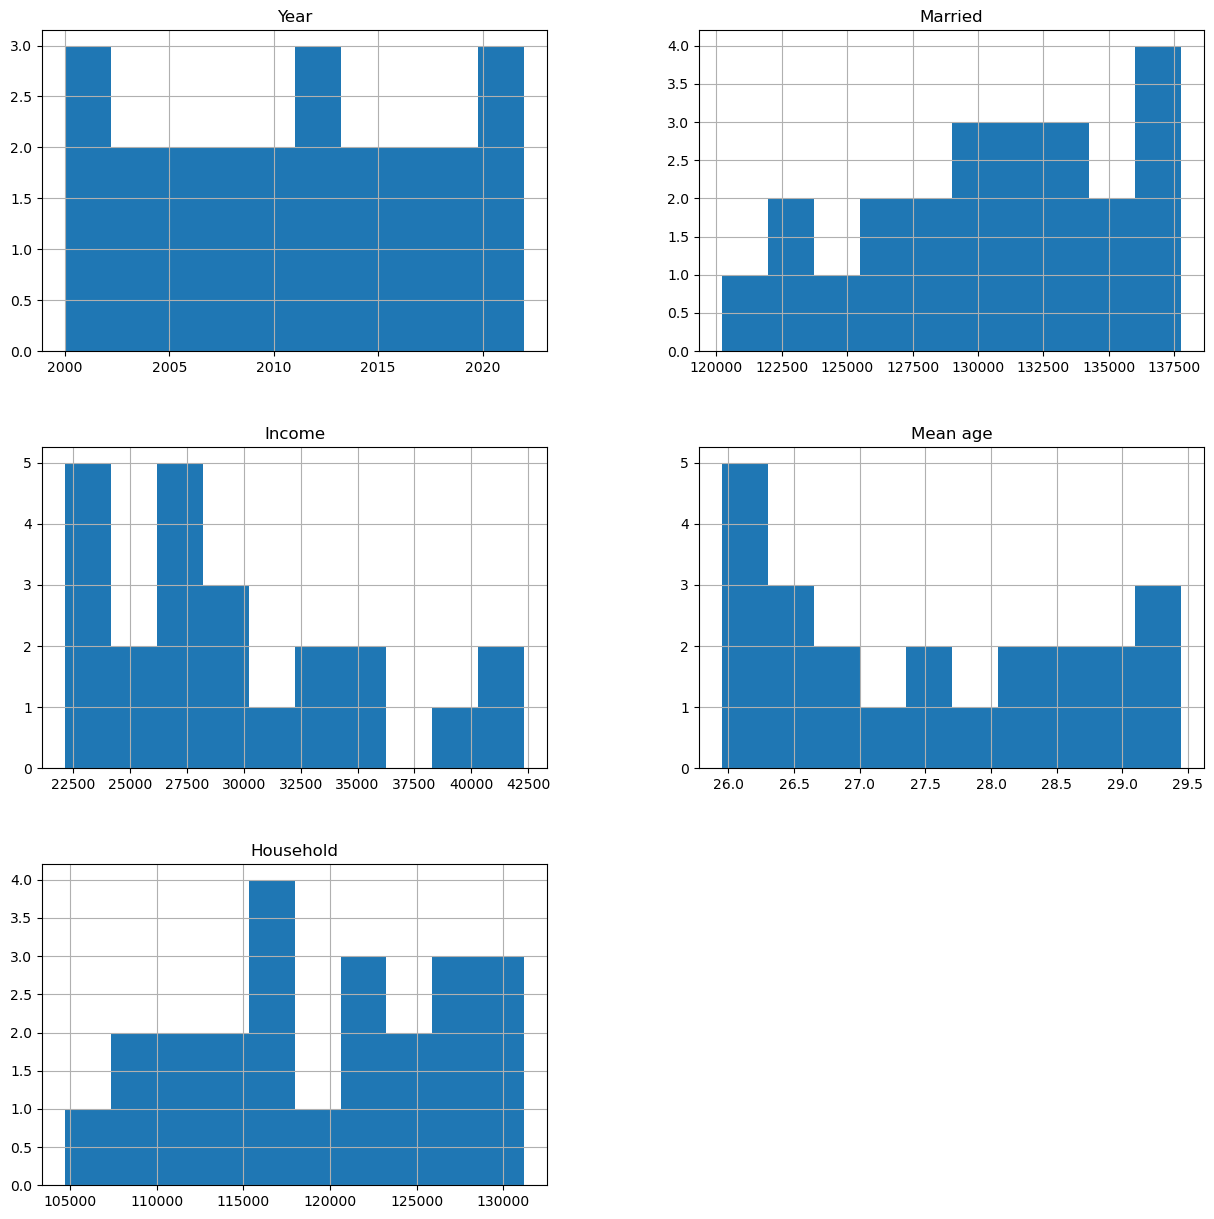

In [275]:

df.hist(figsize=(15,15), bins=10)
plt.show()

# Income na małżeństwa

In [276]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [277]:
# model = CmdStanModel(stan_file='model_1_prior.stan')
model = CmdStanModel(stan_file='model_adam_1_prior.stan')
N = 23
R=100

In [278]:
data = {"alpha" : np.log(df["Married"].mean()),
        "income" : df["Income"].mean() / 10000}
# data = {'N': N, 'income': df['Income']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

20:41:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


20:41:40 - cmdstanpy - INFO - CmdStan done processing.


In [279]:
gen_1.draws_pd()

,lp__,accept_stat__,theta,y_sim
0,0.0,0.0,0.947860,2122840.0
1,0.0,0.0,0.022281,139441.0
2,0.0,0.0,0.291860,308227.0
3,0.0,0.0,0.543053,646093.0
4,0.0,0.0,0.126786,189971.0
...,...,...,...,...
95,0.0,0.0,0.164126,211997.0
96,0.0,0.0,0.448334,488602.0
97,0.0,0.0,0.212835,244532.0
98,0.0,0.0,0.372062,389901.0


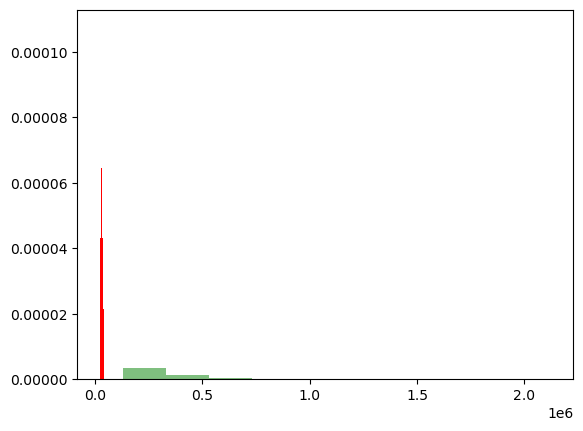

In [280]:
plt.hist(df['Income'], bins=10, color='red', density=True)
plt.hist(gen_1.y_sim, bins=10, color='green', alpha = 0.5, density=True)
# plt.hist(gen_1.y_sim.mean(0), bins=10, color='green', alpha = 0.5, density=True)
plt.show()

In [281]:
post_model = CmdStanModel(stan_file='model_1_posterior.stan')

post_model = CmdStanModel(stan_file='model_adam_1_posterior.stan')

20:41:41 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\model_adam_1_posterior.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\model_adam_1_posterior.exe
20:42:10 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\model_adam_1_posterior.exe
20:42:10 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
20:42:10 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/model_adam_1_posterior.hpp C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/model_adam_1_posterior.stan
Warning in 'C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/model_adam_1_posterior.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automati

In [282]:
data_post = {'N': N, 'y': df['Income'].values, 'income': df['Income']}

data_post = {
    'N': len(df),
    'x': df['Income'].values/10000,
    'y': df['Married'].values,
    'mu_alpha': np.log(df['Income'].mean()),
    'sig_alpha': np.log(df['Income'].std()),
    'mu_theta': 0,
    'sig_theta': 0.35
}

fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

20:42:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


20:42:15 - cmdstanpy - INFO - CmdStan done processing.


In [283]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,y_pred[1],...,y_pred[14],y_pred[15],y_pred[16],y_pred[17],y_pred[18],y_pred[19],y_pred[20],y_pred[21],y_pred[22],y_pred[23]
0,32399500.0,0.964008,0.053371,1.0,3.0,0.0,-32399500.0,11.6134,0.056689,140506.0,...,128476.0,128256.0,129082.0,127475.0,126376.0,127059.0,126404.0,126301.0,125603.0,125676.0
1,32399500.0,0.963086,0.053371,3.0,15.0,0.0,-32399500.0,11.6122,0.056864,140069.0,...,127641.0,127842.0,127891.0,128099.0,126192.0,125921.0,126183.0,125028.0,125855.0,125454.0
2,32399500.0,0.706021,0.053371,3.0,15.0,0.0,-32399500.0,11.6115,0.056883,140655.0,...,128343.0,127923.0,128396.0,128056.0,127140.0,127208.0,125546.0,124882.0,125601.0,125257.0
3,32399500.0,1.000000,0.053371,4.0,27.0,0.0,-32399500.0,11.6095,0.057738,140713.0,...,127899.0,128169.0,128095.0,128401.0,127236.0,126362.0,125701.0,125058.0,125844.0,124707.0
4,32399500.0,0.898277,0.053371,4.0,19.0,0.0,-32399500.0,11.6103,0.057912,141114.0,...,128298.0,129034.0,128596.0,127489.0,127518.0,126115.0,126387.0,125616.0,125248.0,125254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32399500.0,0.991240,0.053371,5.0,43.0,0.0,-32399500.0,11.6167,0.055614,140730.0,...,128115.0,128815.0,128051.0,128879.0,127063.0,126553.0,126503.0,125367.0,125360.0,125638.0
96,32399500.0,0.974461,0.053371,2.0,3.0,0.0,-32399500.0,11.6168,0.055516,139558.0,...,128016.0,128695.0,128543.0,127924.0,126848.0,126099.0,125753.0,125540.0,125051.0,125287.0
97,32399500.0,0.788449,0.053371,1.0,3.0,0.0,-32399500.0,11.6166,0.055283,140841.0,...,128017.0,128163.0,128473.0,128513.0,127389.0,126613.0,126505.0,125859.0,125107.0,125241.0
98,32399500.0,0.935450,0.053371,2.0,5.0,0.0,-32399500.0,11.6170,0.055326,140391.0,...,129025.0,128805.0,128999.0,128598.0,127539.0,126149.0,126466.0,125364.0,125302.0,124609.0


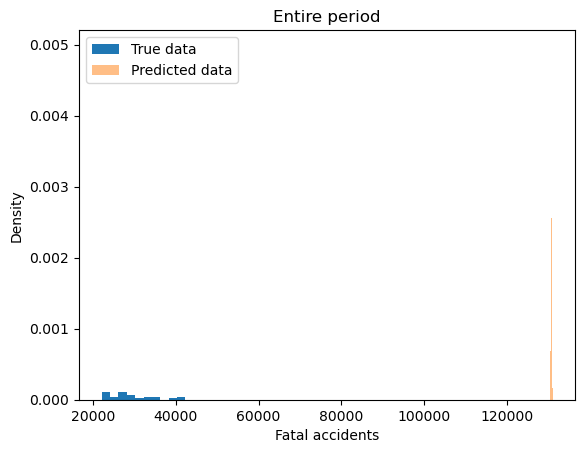

In [286]:
plt.hist(df['Income'], density=True, label= 'True data')
plt.hist(fit_1.y_pred.mean(1), alpha = 0.5, density=True, label ='Predicted data')
#plt.hist(fit_1.y_sim.mean(1), alpha = 0.5, density=True, label ='Predicted data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Fatal accidents')
plt.legend()
plt.show()

In [ ]:
az.summary(fit_1)

In [ ]:
az.plot_posterior(fit_1)
plt.show()

# Income i Household na ilość małżeństw